# EDA

** NB: ** Set the argument `output_image` of the plotting functions to `False` when running the notebook to have interactive plots (some have a dropdown that allows to choose the province/region)

In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm
tqdm.pandas()

from pathlib import Path

import sys
sys.path.insert(0, os.path.abspath('../src'))

from utils import *
from plots import *

In [2]:
data_path = "../data"

In [3]:
DataDownloader(data_path).download_all_csv()

In [4]:
covidpro_df, dpc_regioni_df, dpc_province_df, pop_prov_df, prov_list_df = load_data(data_path)

In [5]:
covidpro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26023 entries, 0 to 26022
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_prov         26023 non-null  int64         
 1   Province        26023 non-null  object        
 2   Date            26023 non-null  datetime64[ns]
 3   Deaths          26023 non-null  int64         
 4   Tot_deaths      26023 non-null  int64         
 5   New_cases       26023 non-null  int64         
 6   Curr_pos_cases  26023 non-null  int64         
 7   Region          26023 non-null  object        
 8   id_reg          26023 non-null  int64         
 9   NP_R            26023 non-null  float64       
 10  DR              26023 non-null  float64       
 11  NP_R_Rolling    26023 non-null  float64       
 12  DR_Rolling      26023 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(6), object(2)
memory usage: 2.6+ MB


In [6]:
covidpro_df.head()

,id_prov,Province,Date,Deaths,Tot_deaths,New_cases,Curr_pos_cases,Region,id_reg,NP_R,DR,NP_R_Rolling,DR_Rolling
0,84,Agrigento,2020-02-24,0,0,0,0,Sicilia,19,0.0,0.0,0.0,0.0
1,6,Alessandria,2020-02-24,0,0,0,0,Piemonte,1,0.0,0.0,0.0,0.0
2,42,Ancona,2020-02-24,0,0,0,0,Marche,11,0.0,0.0,0.0,0.0
3,7,Aosta,2020-02-24,0,0,0,0,Valle d'Aosta,2,0.0,0.0,0.0,0.0
4,51,Arezzo,2020-02-24,0,0,0,0,Toscana,9,0.0,0.0,0.0,0.0


In [7]:
covidpro_df.tail()

,id_prov,Province,Date,Deaths,Tot_deaths,New_cases,Curr_pos_cases,Region,id_reg,NP_R,DR,NP_R_Rolling,DR_Rolling
26018,2,Vercelli,2020-12-05,0,313,44,6666,Piemonte,1,0.006601,0.0,0.016053,0.000076
26019,23,Verona,2020-12-05,0,627,793,30485,Veneto,5,0.026013,0.0,0.017857,0.000000
26020,102,Vibo Valentia,2020-12-05,0,21,5,980,Calabria,18,0.005102,0.0,0.015010,0.000000
26021,24,Vicenza,2020-12-05,0,536,448,28616,Veneto,5,0.015656,0.0,0.015620,0.000000
26022,56,Viterbo,2020-12-05,0,157,21,7162,Lazio,12,0.002932,0.0,0.012438,0.000000


In [8]:
dpc_regioni_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6027 entries, 0 to 6026
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   data                          6027 non-null   datetime64[ns]
 1   stato                         6027 non-null   object        
 2   codice_regione                6027 non-null   int64         
 3   denominazione_regione         6027 non-null   object        
 4   lat                           6027 non-null   float64       
 5   long                          6027 non-null   float64       
 6   ricoverati_con_sintomi        6027 non-null   int64         
 7   terapia_intensiva             6027 non-null   int64         
 8   totale_ospedalizzati          6027 non-null   int64         
 9   isolamento_domiciliare        6027 non-null   int64         
 10  totale_positivi               6027 non-null   int64         
 11  variazione_totale_positivi    

In [9]:
dpc_regioni_df.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,casi_testati,note,NC_R,NP_R,IC_R,Hosp_R,DR,NC_R_Rolling,IC_R_Rolling,totale_positivi_Rolling
0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,0.0,0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,0.0,0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,0.0,0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,0.0,0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,2020-02-24 18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,...,0.0,0,0.121622,1.0,0.111111,0.666667,0.0,0.0,0.0,0.0


In [10]:
dpc_regioni_df.tail()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,casi_testati,note,NC_R,NP_R,IC_R,Hosp_R,DR,NC_R_Rolling,IC_R_Rolling,totale_positivi_Rolling
6022,2020-12-06 17:00:00,ITA,19,Sicilia,38.115697,13.362357,1367,213,1580,38166,...,692062.0,0,0.001000,0.025713,0.005359,0.039752,0.044256,0.000901,0.006568,26089.857143
6023,2020-12-06 17:00:00,ITA,9,Toscana,43.769231,11.255889,1360,252,1612,27587,...,983103.0,0,0.000458,0.025789,0.008630,0.055207,0.098188,0.000914,0.007275,29873.571429
6024,2020-12-06 17:00:00,ITA,10,Umbria,43.106758,12.388247,332,60,392,5673,...,231538.0,0,0.000534,0.038582,0.009893,0.064633,0.075845,0.000881,0.008269,29179.857143
6025,2020-12-06 17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,102,8,110,877,...,34644.0,0,0.000607,0.034448,0.008105,0.111449,0.337386,0.000890,0.006590,28975.571429
6026,2020-12-06 17:00:00,ITA,5,Veneto,45.434905,12.338452,2508,308,2816,73988,...,1090932.0,0,0.001194,0.044841,0.004010,0.036665,0.054815,0.000951,0.006386,30513.571429


In [11]:
dpc_province_df.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note
0,2020-02-24 18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,0
1,2020-02-24 18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,0
2,2020-02-24 18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,0
3,2020-02-24 18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,0
4,2020-02-24 18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,0,0.000000,0.000000,0,0


In [12]:
dpc_province_df.tail()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note
40196,2020-12-06 17:00:00,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,24142,0
40197,2020-12-06 17:00:00,ITA,5,Veneto,28,Padova,PD,45.406930,11.876087,31073,0
40198,2020-12-06 17:00:00,ITA,5,Veneto,29,Rovigo,RO,45.071073,11.790070,4577,0
40199,2020-12-06 17:00:00,ITA,5,Veneto,899,Fuori Regione / Provincia Autonoma,0,0.000000,0.000000,2809,0
40200,2020-12-06 17:00:00,ITA,5,Veneto,999,In fase di definizione/aggiornamento,0,0.000000,0.000000,403,0


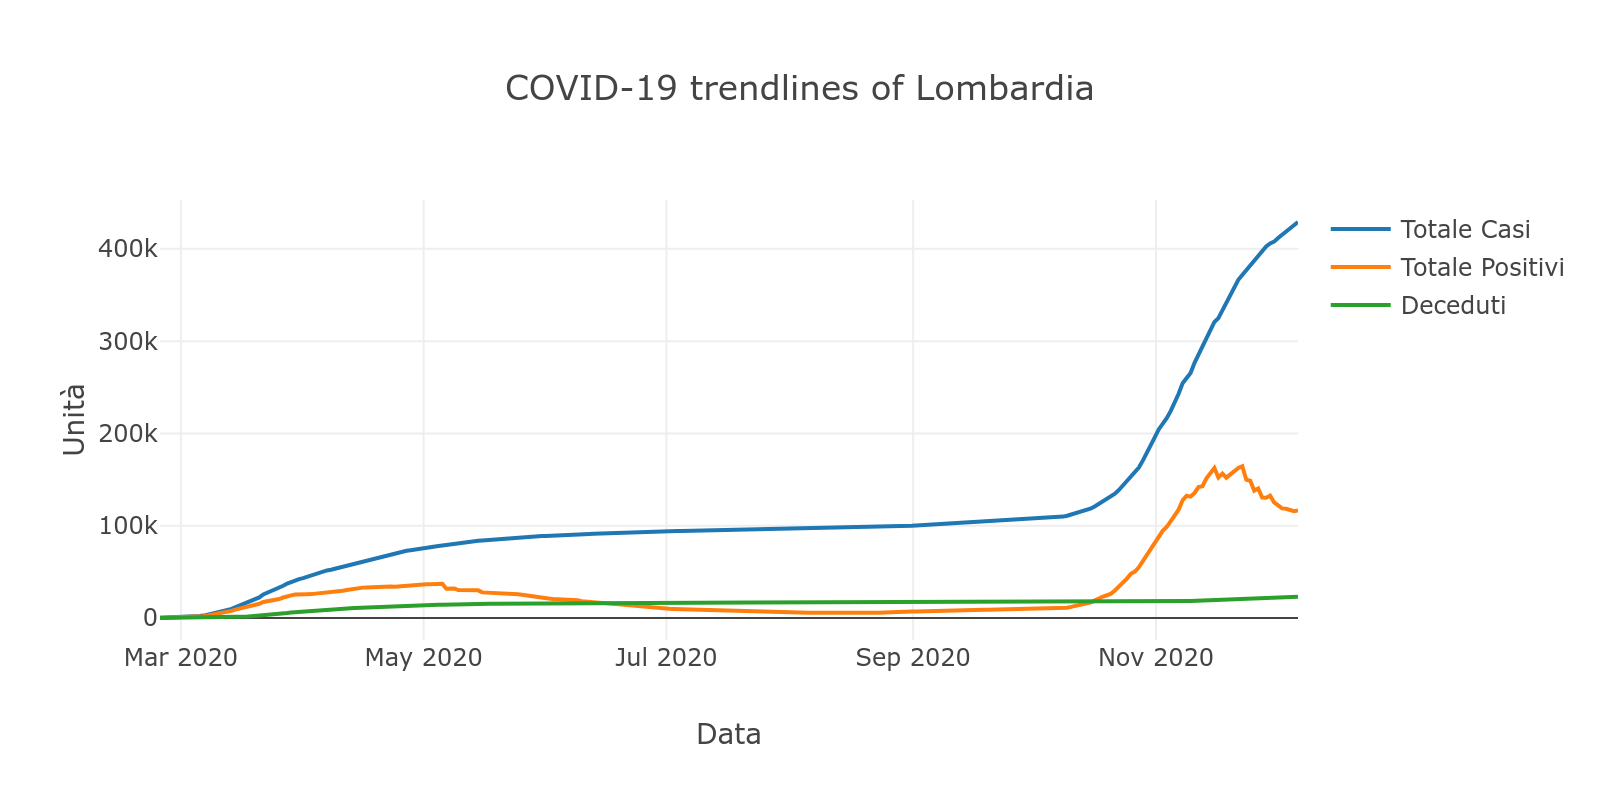

In [13]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['totale_casi', 'totale_positivi', 'deceduti'],
                    legend_titles=['Totale Casi', 'Totale Positivi', 'Deceduti'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Unità',
                    output_image=True)

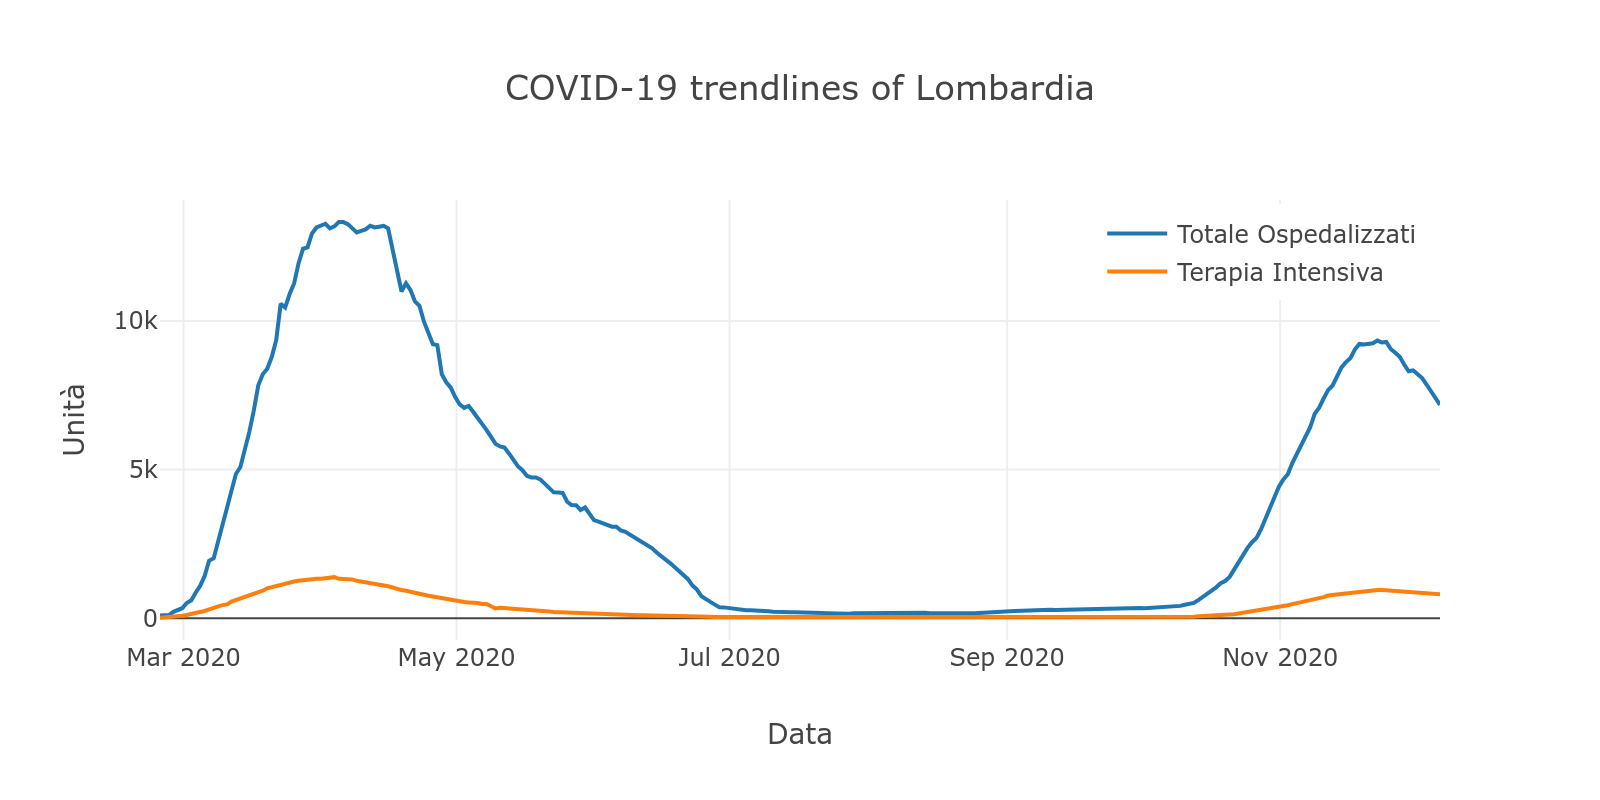

In [14]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['totale_ospedalizzati', 'terapia_intensiva'],
                    legend_titles=['Totale Ospedalizzati', 'Terapia Intensiva'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Unità',
                    output_image=True,
                    blend_legend=True)

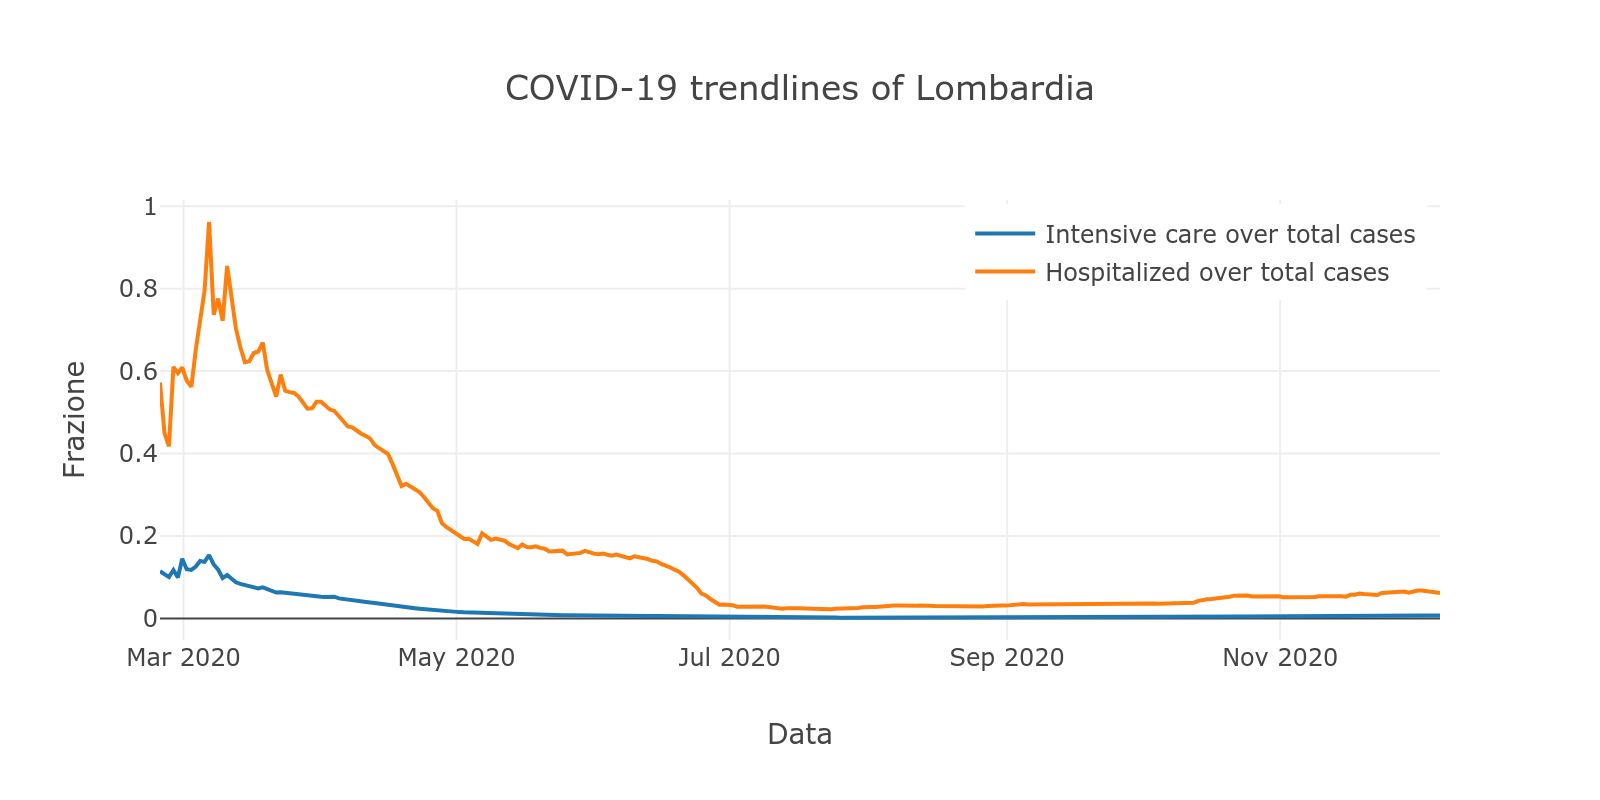

In [15]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['IC_R', 'Hosp_R'],
                    legend_titles=['Intensive care over total cases', 'Hospitalized over total cases'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Frazione',
                    output_image=True,
                    blend_legend=True)

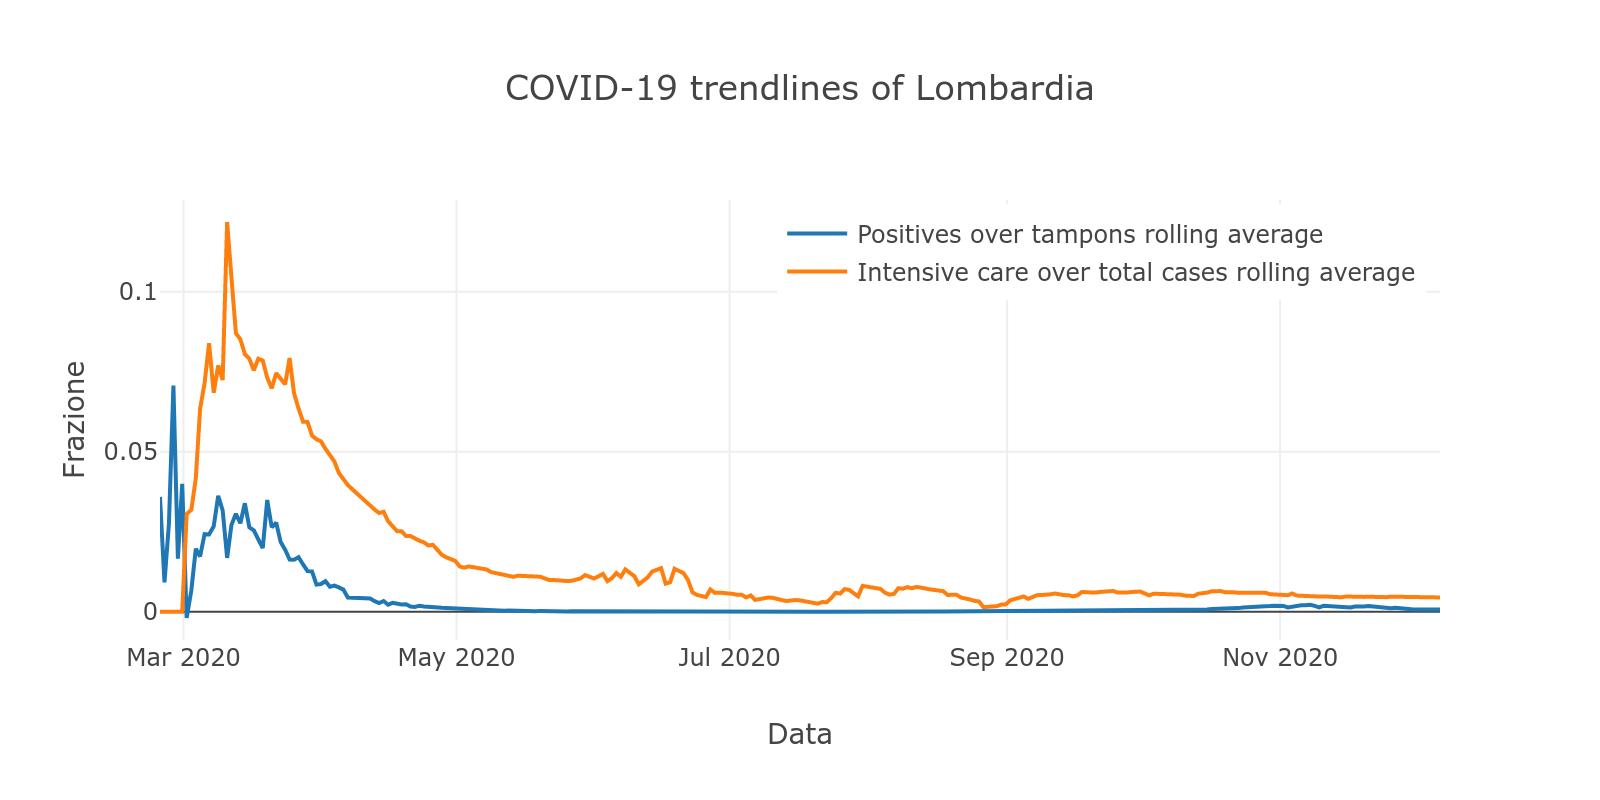

In [16]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['NC_R_Rolling', 'IC_R_Rolling'],
                    legend_titles=['Positives over tampons rolling average', 'Intensive care over total cases rolling average'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Frazione',
                    output_image=True,
                    blend_legend=True)

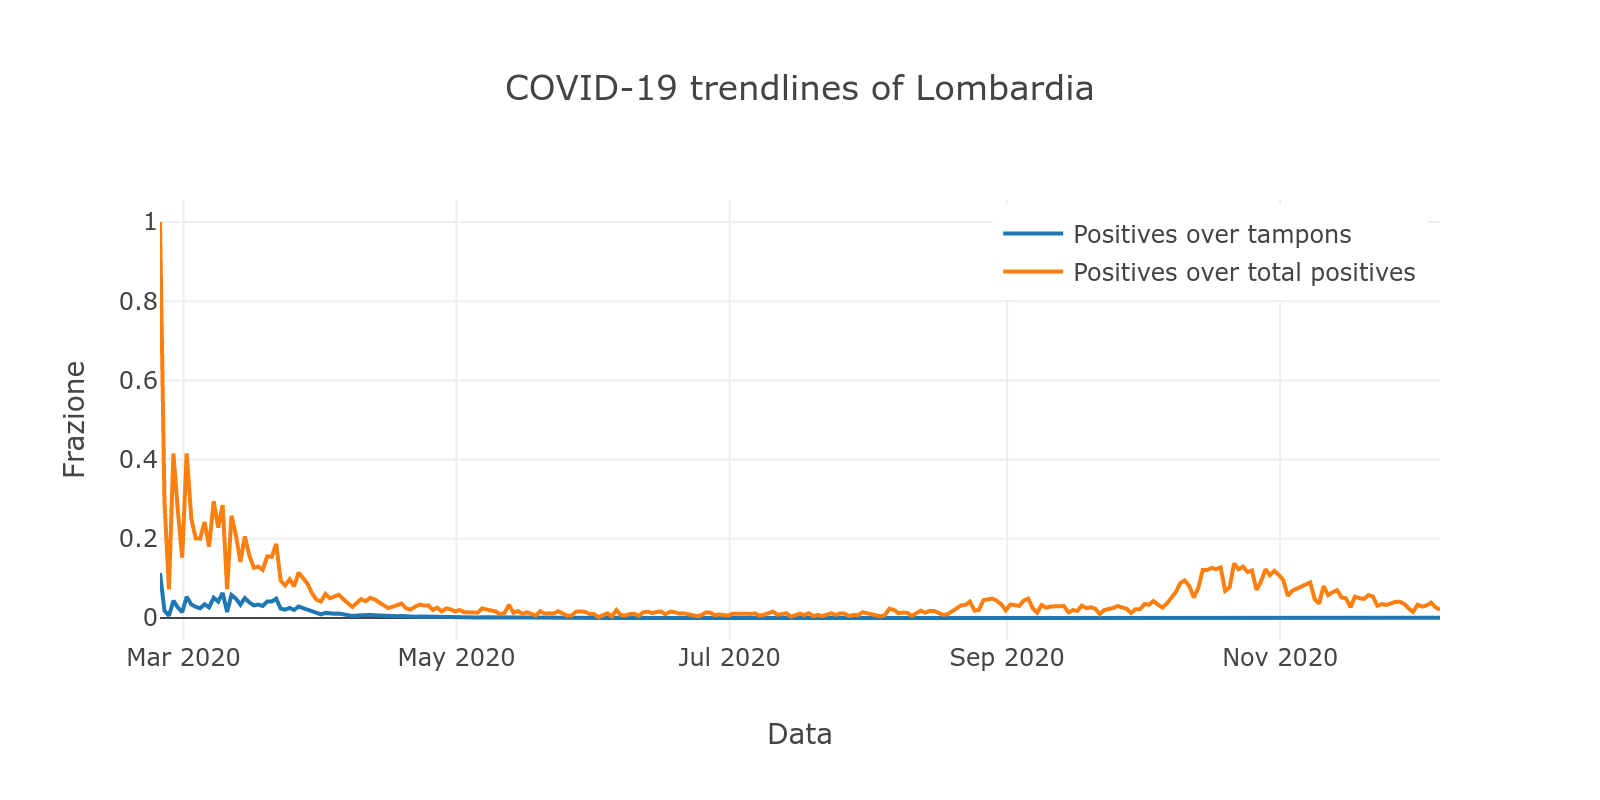

In [17]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['NC_R', 'NP_R'],
                    legend_titles=['Positives over tampons', 'Positives over total positives'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Frazione',
                    output_image=True,
                    blend_legend=True)

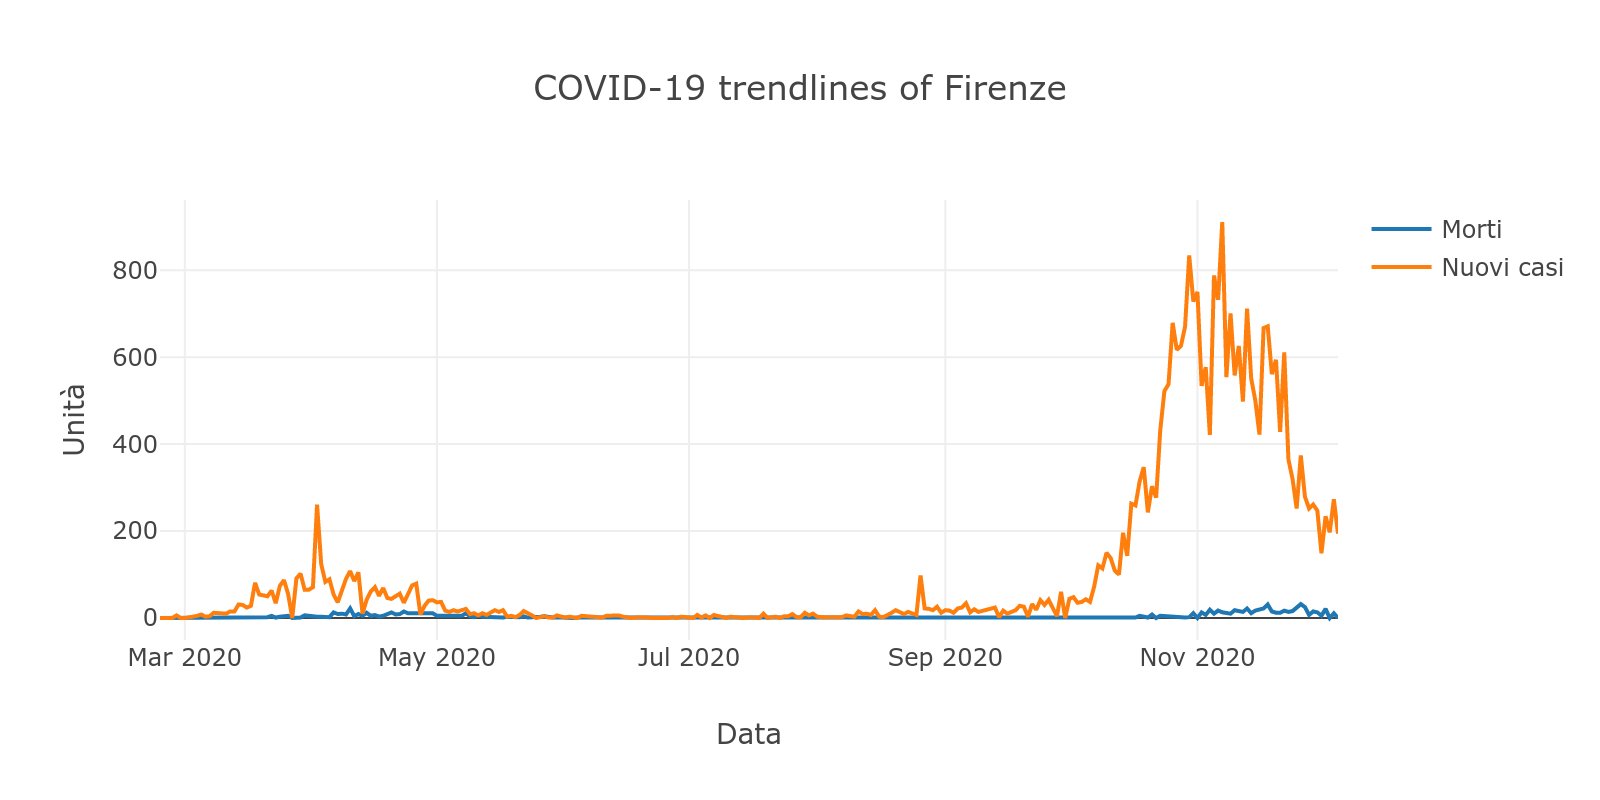

In [18]:
inter_dropdown_plot(options=covidpro_df['Province'].unique(), 
                    default_value='Firenze', 
                    dropdown_label='Provincia',
                    y=['Deaths', 'New_cases'],
                    legend_titles=['Morti', 'Nuovi casi'],
                    data=covidpro_df,
                    group_column='Province',
                    x='Date',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Unità',
                    output_image=True,
                    blend_legend=False)

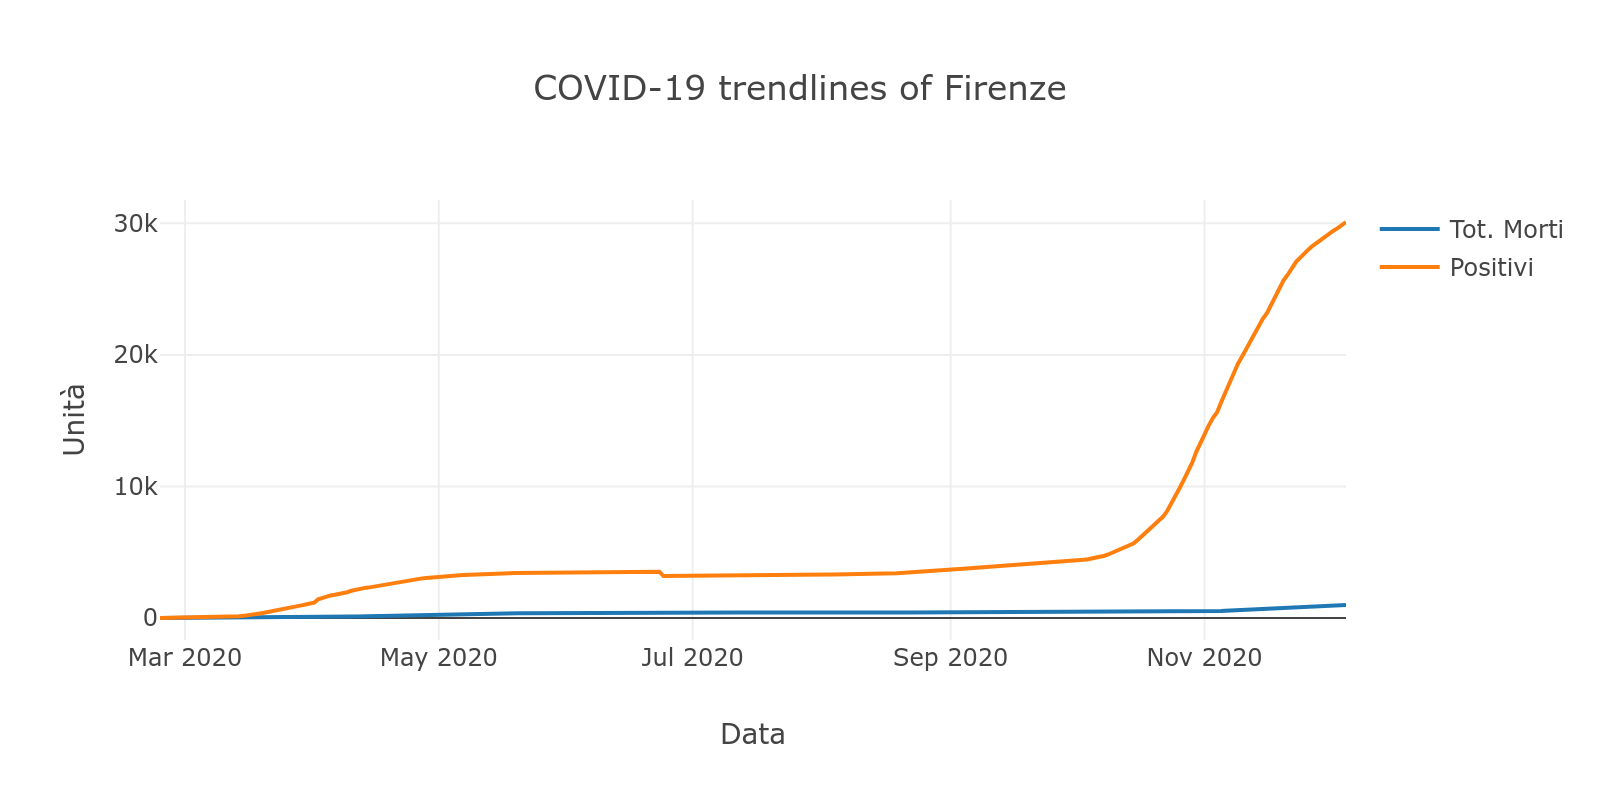

In [19]:
inter_dropdown_plot(options=covidpro_df.Province.unique(), 
                    default_value='Firenze', 
                    dropdown_label='Provincia',
                    y=['Tot_deaths', 'Curr_pos_cases'],
                    legend_titles=['Tot. Morti', 'Positivi'],
                    data=covidpro_df,
                    group_column='Province',
                    x='Date',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Unità',
                    output_image=True,
                    blend_legend=False)

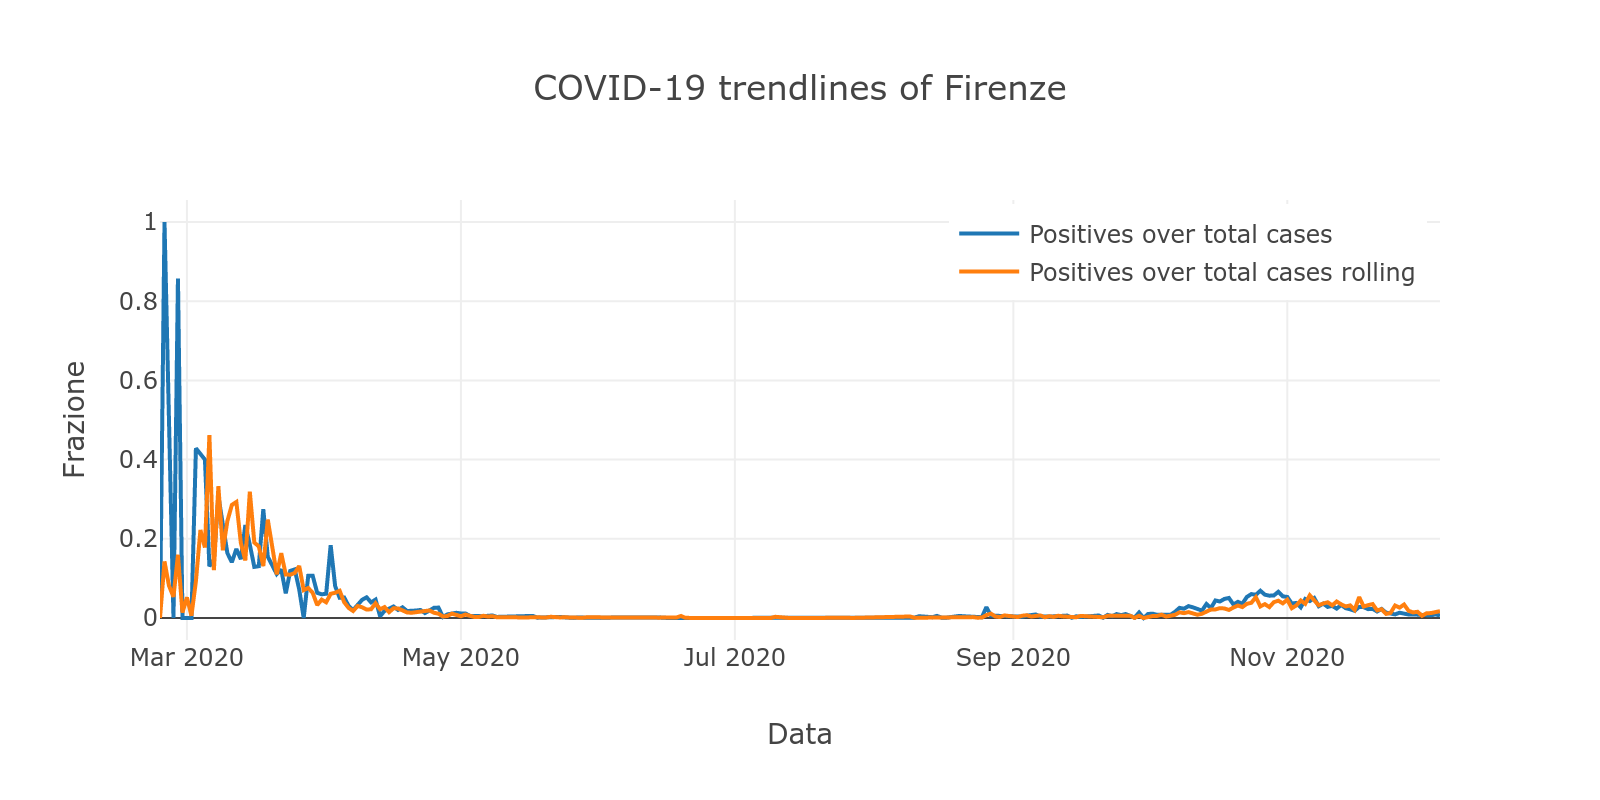

In [20]:
inter_dropdown_plot(options=covidpro_df['Province'].unique(), 
                    default_value='Firenze', 
                    dropdown_label='Provincia',
                    y=['NP_R', 'NP_R_Rolling'],
                    legend_titles=['Positives over total cases', 'Positives over total cases rolling'],
                    data=covidpro_df,
                    group_column='Province',
                    x='Date',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Frazione',
                    output_image=True,
                    blend_legend=True)

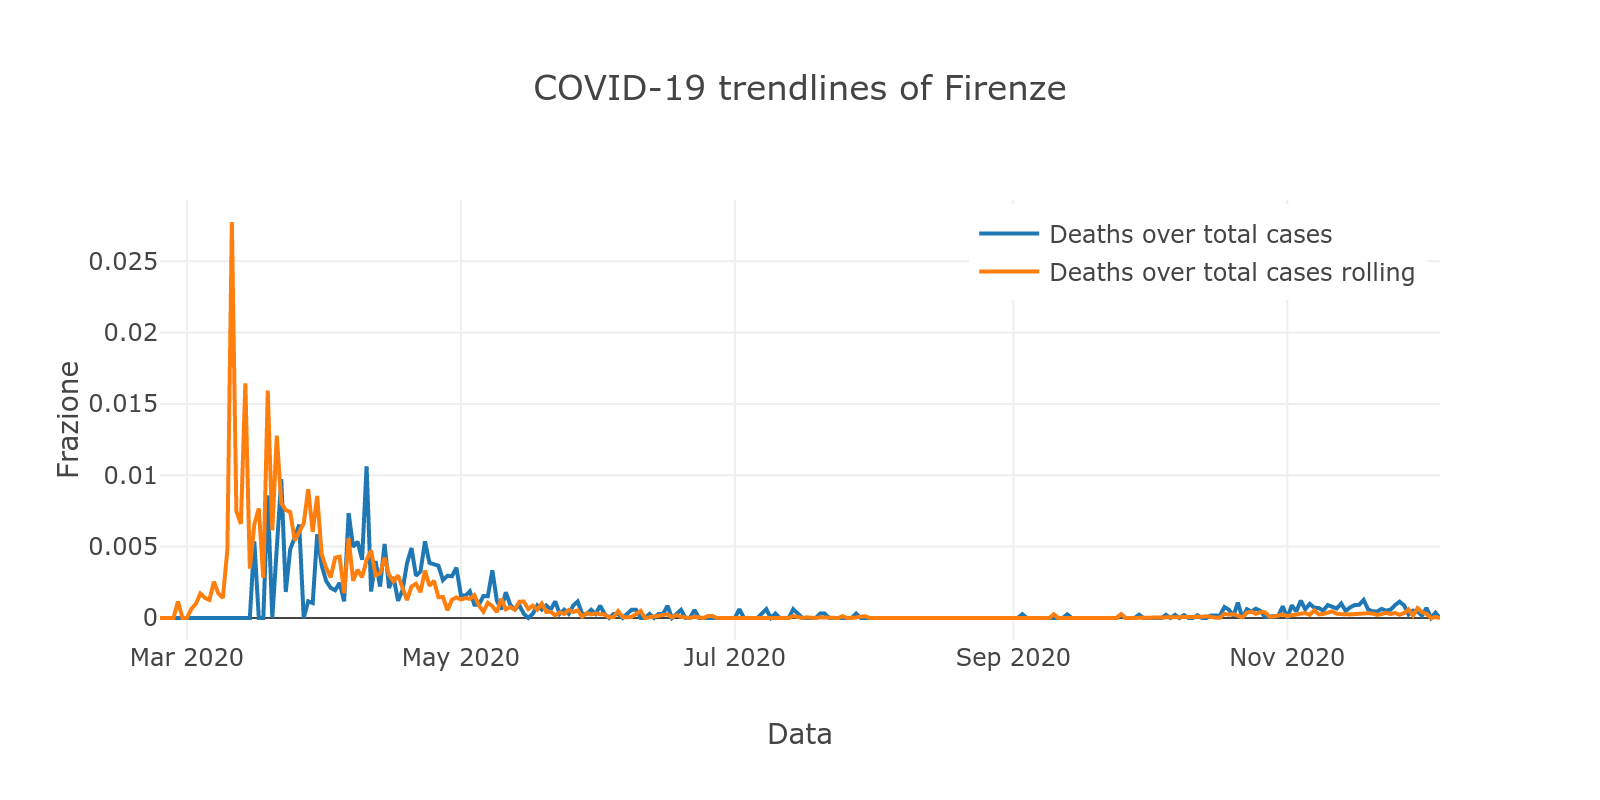

In [21]:
inter_dropdown_plot(options=covidpro_df['Province'].unique(), 
                    default_value='Firenze', 
                    dropdown_label='Provincia',
                    y=['DR', 'DR_Rolling'],
                    legend_titles=['Deaths over total cases', 'Deaths over total cases rolling'],
                    data=covidpro_df,
                    group_column='Province',
                    x='Date',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Frazione',
                    output_image=True,
                    blend_legend=True)